In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline


In [2]:
df = pd.read_csv('Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [5]:
df.shape

(768, 7)

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
# returns the count of null values in each column.
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [8]:
df.isna().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [9]:
# dropping the null values

df = df.dropna()

In [10]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [11]:
df.shape

(740, 7)

In [12]:
df.duplicated().sum()

0

In [14]:
# State with highest unemployment

df['Region'].value_counts().idxmax() # it will give you the value that appears most frequently in the month column of the dataset
                                     # idmax() returns the index with highest count

'Andhra Pradesh'

In [15]:
df['Region'].value_counts()

,count
Region,
Andhra Pradesh,28
Kerala,28
West Bengal,28
Uttar Pradesh,28
Tripura,28
Telangana,28
Tamil Nadu,28
Rajasthan,28
Punjab,28


In [16]:
# State with the lowest unemployment

df['Region'].value_counts().idxmin()

'Chandigarh'

In [20]:
import datetime as dt
import calendar

df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)
df['month_int'] = df[' Date'].dt.month
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])



In [21]:
# month with highest unemployment
df['month'].value_counts().idxmax()

'May'

In [22]:
# month with lowest unemployment
df['month'].value_counts().idxmin()

'Apr'

In [23]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [27]:
df.drop(columns=[' Frequency','month_int'])

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [30]:
# top 10 states with highest unemployment

df.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False).head(10)


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,month_int,month
627,Puducherry,2020-04-30,Monthly,76.74,68122.0,35.54,Urban,4,Apr
628,Puducherry,2020-05-31,Monthly,75.00,64538.0,31.25,Urban,5,May
242,Puducherry,2020-04-30,Monthly,74.51,49420.0,46.79,Rural,4,Apr
531,Jharkhand,2020-05-31,Monthly,70.17,830347.0,40.49,Urban,5,May
530,Jharkhand,2020-04-30,Monthly,61.48,1054829.0,39.92,Urban,4,Apr
412,Bihar,2020-04-30,Monthly,58.77,1400962.0,34.94,Urban,4,Apr
145,Jharkhand,2020-05-31,Monthly,55.10,3315038.0,37.03,Rural,5,May
287,Tamil Nadu,2020-04-30,Monthly,53.19,5086200.0,33.05,Rural,4,Apr
507,Himachal Pradesh,2020-05-31,Monthly,50.00,134868.0,43.55,Urban,5,May
38,Bihar,2020-05-31,Monthly,47.26,14050319.0,38.50,Rural,5,May


Text(0, 0.5, 'Number of people Unemployment %')

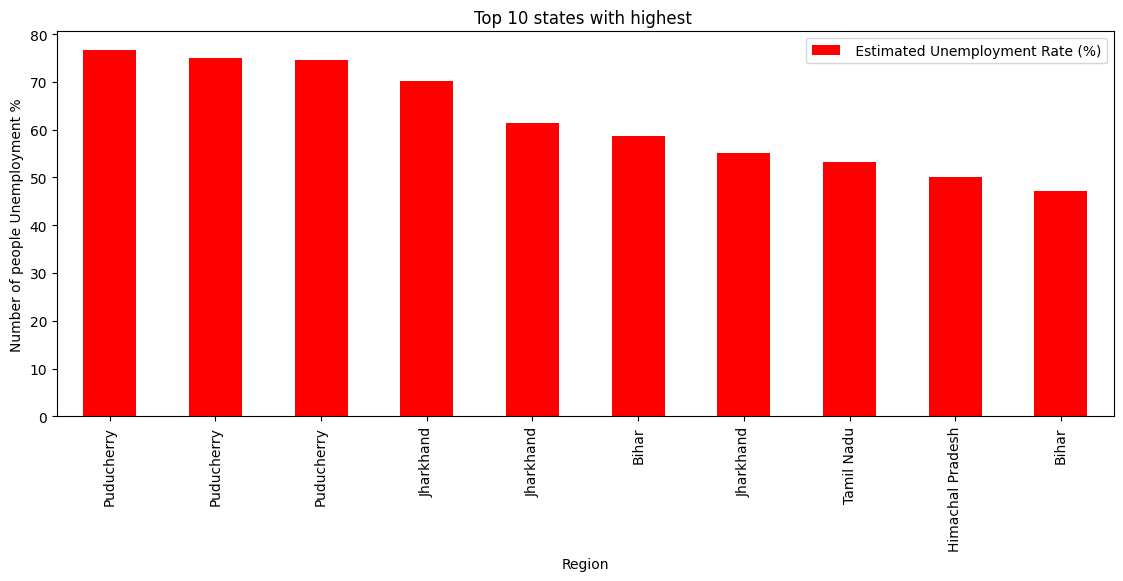

In [45]:
# top 10 states with highest unemployment
top_10_states = df.sort_values(by=' Estimated Unemployment Rate (%)', ascending=False).head(10)

# Visualization
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)

top_10_states.plot(x='Region', y=' Estimated Unemployment Rate (%)', kind='bar', color='red', figsize=(30,5), ax=ax0)

ax0.set_title('Top 10 states with highest ')
ax0.set_xlabel('Region')
ax0.set_ylabel('Number of people Unemployment %')

In [63]:
# visulaize labor participation rate and unemployment rate in each month

# Check actual column names in your DataFrame
print(df.columns)

# Adjust column names in groupby if necessary
df_EEE = df.groupby(['month'])[[ ' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean()
df_EEE = pd.DataFrame(df_EEE).reset_index()
month = df_EEE.month
unemployment_rate = df_EEE[' Estimated Unemployment Rate (%)']
labor_participation_rate = df_EEE[' Estimated Labour Participation Rate (%)']


fig = go.Figure()
# Change 'line_color' to 'marker_color' for bar charts
fig.add_trace(go.Bar(x=month, y=unemployment_rate, name='Unemployment Rate', marker_color='red'))
fig.add_trace(go.Bar(x=month, y=labor_participation_rate, name='Labor Participation Rate', marker_color='blue'))
fig.update_layout(barmode='group')
fig.show()

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'month_int', 'month'],
      dtype='object')


In [84]:
df = df.reset_index()
df = df[['Region',' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed', ascending=False)
df

,Estimated Employed
Region,
Uttar Pradesh,786655301.0
Maharashtra,559725484.0
West Bengal,481559064.0
Bihar,346253296.0
Tamil Nadu,343547309.0
Gujarat,319256358.0
Madhya Pradesh,311233561.0
Karnataka,298679340.0
Rajasthan,281149813.0


Text(0, 0.5, 'Number of people Employed')

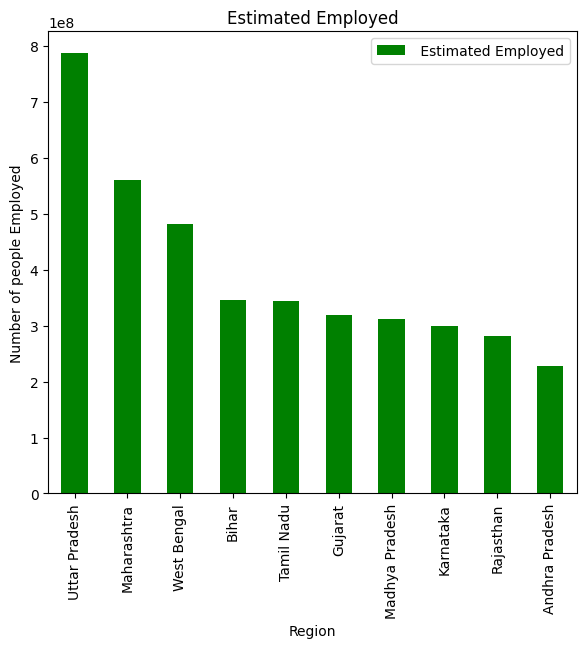

In [89]:
# State with Estimated Employed visualization
df = df.reset_index()
df = df[['Region',' Estimated Employed']].groupby('Region').sum().sort_values(' Estimated Employed', ascending=False)
df.head(10)
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)

# Employed
df[:10].plot(kind='bar',color='green',figsize=(15,6),ax=ax1)
ax1.set_title('Estimated Employed')
ax1.set_xlabel('Region')
ax1.set_ylabel('Number of people Employed')

In [94]:
# Estimated Unemployment Rate state wise unemployment Rate (%)--
df = pd.read_csv('Unemployment in India.csv')  # Reload the original DataFrame
df = df.dropna()  # Drop NA values if necessary
df = df.reset_index()
df_a = df[['Region', ' Estimated Unemployment Rate (%)']].groupby('Region').sum().sort_values(' Estimated Unemployment Rate (%)', ascending=False)
df_a

,Estimated Unemployment Rate (%)
Region,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96
